In [1]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip \
    -O /tmp/horse-or-human.zip

--2020-03-02 15:34:35--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 216.58.207.240, 2a00:1450:400f:807::2010
Connecting to storage.googleapis.com (storage.googleapis.com)|216.58.207.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘/tmp/horse-or-human.zip’

/tmp/horse-or-human 100%[===================>] 142.65M  26.2MB/s    in 6.1s    

2020-03-02 15:34:42 (23.5 MB/s) - ‘/tmp/horse-or-human.zip’ saved [149574867/149574867]



In [2]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip \
    -O /mnt/Veeru/cv_exp/data/publicDataset/validation-horse-or-human.zip

--2020-03-02 15:34:44--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 216.58.207.240, 2a00:1450:400f:807::2010
Connecting to storage.googleapis.com (storage.googleapis.com)|216.58.207.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11480187 (11M) [application/zip]
Saving to: ‘/mnt/Veeru/cv_exp/data/publicDataset/validation-horse-or-human.zip’

/mnt/Veeru/cv_exp/d 100%[===================>]  10.95M  13.6MB/s    in 0.8s    

2020-03-02 15:34:46 (13.6 MB/s) - ‘/mnt/Veeru/cv_exp/data/publicDataset/validation-horse-or-human.zip’ saved [11480187/11480187]



In [3]:
import setGPU

import os, zipfile

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import tensorflow as tf

setGPU: Setting GPU to: 0


/home/vuu/anaconda3/envs/tfpy3_exp/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/vuu/anaconda3/envs/tfpy3_exp/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/vuu/anaconda3/envs/tfpy3_exp/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/vuu/anaconda3/envs/tfpy3_exp/lib/python3

In [4]:
local_zip='../../../../data/publicDataset/horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('../../../../data/publicDataset/horse-or-human')
zip_ref.close()

In [5]:
train_horse_dir = '../../../../data/publicDataset/horse-or-human/horses'
train_horse_names = os.listdir(train_horse_dir)
print(train_horse_names[0])
print('total train horse images:', len(train_horse_names))

train_human_dir = '../../../../data/publicDataset/horse-or-human/humans'
train_human_names = os.listdir(train_human_dir)
print(train_human_names[0])
print("total train human images", len(train_human_names))

validation_horse_dir = '../../../../data/publicDataset/validation-horse-or-human/horses'
validation_horse_names = os.listdir(validation_horse_dir)

validation_human_dir = '../../../../data/publicDataset/validation-horse-or-human/humans'
validation_human_names = os.listdir(validation_human_dir)

horse49-5.png
total train horse images: 500
human02-22.png
total train human images 527


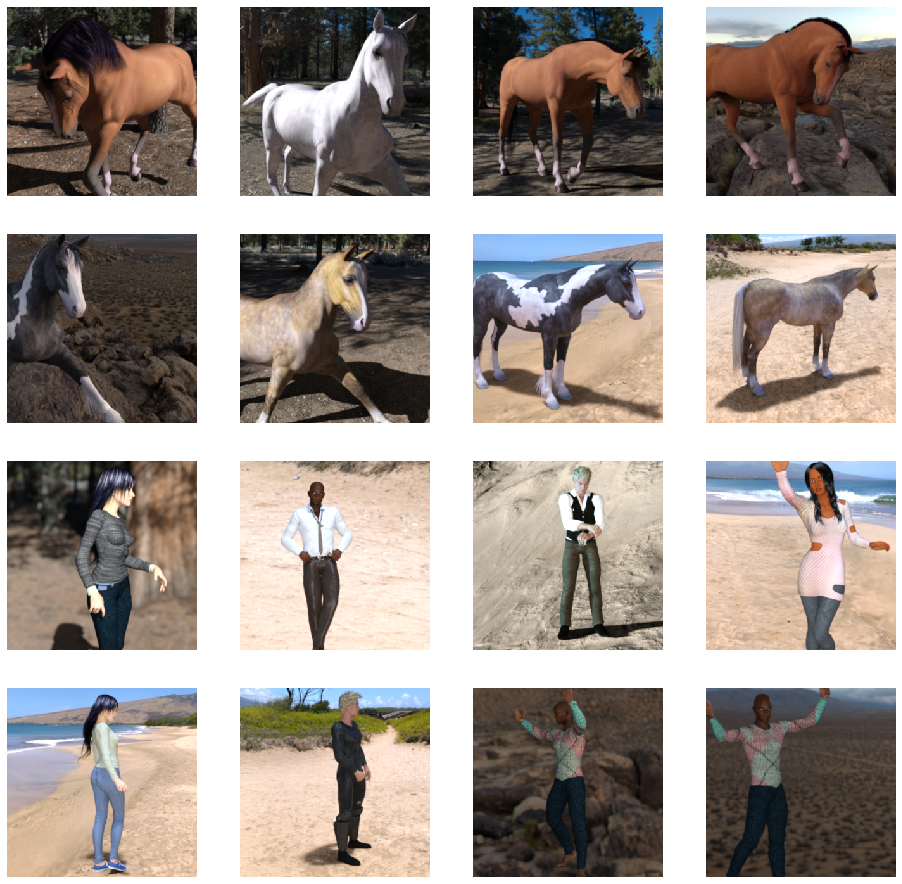

In [6]:
#display a few images
nRows = 4
nCols = 4

picIndex = 0

fig = plt.gcf()
fig.set_size_inches(nCols*4, nRows*4)

picIndex += 8
next_horse_pix = [os.path.join(train_horse_dir, fname) for fname in train_horse_names[picIndex-8:picIndex]]
next_human_pix = [os.path.join(train_human_dir, fname) for fname in train_human_names[picIndex-8:picIndex]]

for i, img_path in enumerate(next_horse_pix+next_human_pix):
    sp = plt.subplot(nRows, nCols, i+1)
    sp.axis('off')
    
    img = mpimg.imread(img_path)
    plt.imshow(img)
    
plt.show()

In [7]:
#create a model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.summary()

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 147, 147, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 35, 35, 64)        0         
____

In [8]:
model.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.RMSprop(lr=0.001), metrics=['accuracy'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [9]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255)
train_generator = train_datagen.flow_from_directory('../../../../data/publicDataset/horse-or-human', target_size=(300, 300), batch_size=128, class_mode='binary')

valid_datagen = tf.keras.preprocessing.image.ImageDataGenerator()
valid_generator = valid_datagen.flow_from_directory('../../../../data/publicDataset/validation-horse-or-human', target_size=(300, 300), batch_size=32, class_mode='binary')

Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


In [10]:
history = model.fit_generator(train_generator, steps_per_epoch=8, epochs=15, verbose=1, validation_data=valid_generator, validation_steps=8)

Epoch 1/15
8/8 [==============================] - 6s 703ms/step - loss: 1.3907 - acc: 0.5195 - val_loss: 86.5605 - val_acc: 0.5000
Epoch 2/15
8/8 [==============================] - 5s 605ms/step - loss: 0.6829 - acc: 0.5428 - val_loss: 14.7954 - val_acc: 0.8359
Epoch 3/15
8/8 [==============================] - 5s 606ms/step - loss: 0.7873 - acc: 0.5595 - val_loss: 20.6980 - val_acc: 0.6992
Epoch 4/15
8/8 [==============================] - 5s 617ms/step - loss: 0.6082 - acc: 0.7486 - val_loss: 95.4924 - val_acc: 0.7266
Epoch 5/15
8/8 [==============================] - 5s 657ms/step - loss: 0.4320 - acc: 0.8359 - val_loss: 203.4798 - val_acc: 0.7578
Epoch 6/15
8/8 [==============================] - 4s 479ms/step - loss: 0.2041 - acc: 0.9096 - val_loss: 172.4825 - val_acc: 0.8672
Epoch 7/15
8/8 [==============================] - 5s 594ms/step - loss: 0.2244 - acc: 0.9043 - val_loss: 133.9997 - val_acc: 0.8789
Epoch 8/15
8/8 [==============================] - 5s 665ms/step - loss: 0.3541 -

In [11]:
import numpy as np
path = '../../../../data/movie_titles/testUncompressed/FEEEDE0D-FD34-4517-A690-C2F04E3739BE/'
files = os.listdir(path)
for file in files:
    file_path = os.path.join(path, file)
    base, ext = os.path.splitext(file)
    if ext == '.json':
        continue
    img = tf.keras.preprocessing.image.load_img(file_path, target_size=(300, 300))
    x = tf.keras.preprocessing.image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    
    classes = model.predict(x)
    print(classes[0])
    if classes[0] > 0.5:
        print('is a human')
    else:
        print('is a horse')

[0.]
is a horse
[0.]
is a horse
[0.]
is a horse
[0.]
is a horse
[0.]
is a horse
[0.]
is a horse
[0.]
is a horse
[0.]
is a horse
[0.]
is a horse
[0.]
is a horse
[0.]
is a horse
[0.]
is a horse
[0.]
is a horse
[0.]
is a horse


Tensor("conv2d/Relu:0", shape=(?, 298, 298, 16), dtype=float32)
Tensor("max_pooling2d/MaxPool:0", shape=(?, 149, 149, 16), dtype=float32)
Tensor("conv2d_1/Relu:0", shape=(?, 147, 147, 32), dtype=float32)
Tensor("max_pooling2d_1/MaxPool:0", shape=(?, 73, 73, 32), dtype=float32)
Tensor("conv2d_2/Relu:0", shape=(?, 71, 71, 64), dtype=float32)
Tensor("max_pooling2d_2/MaxPool:0", shape=(?, 35, 35, 64), dtype=float32)
Tensor("conv2d_3/Relu:0", shape=(?, 33, 33, 64), dtype=float32)
Tensor("max_pooling2d_3/MaxPool:0", shape=(?, 16, 16, 64), dtype=float32)
Tensor("conv2d_4/Relu:0", shape=(?, 14, 14, 64), dtype=float32)
Tensor("max_pooling2d_4/MaxPool:0", shape=(?, 7, 7, 64), dtype=float32)
Tensor("flatten/Reshape:0", shape=(?, 3136), dtype=float32)
Tensor("dense/Relu:0", shape=(?, 512), dtype=float32)
Tensor("dense_1/Sigmoid:0", shape=(?, 1), dtype=float32)


/home/vuu/anaconda3/envs/tfpy3_exp/lib/python3.7/site-packages/ipykernel_launcher.py:35: RuntimeWarning: invalid value encountered in true_divide


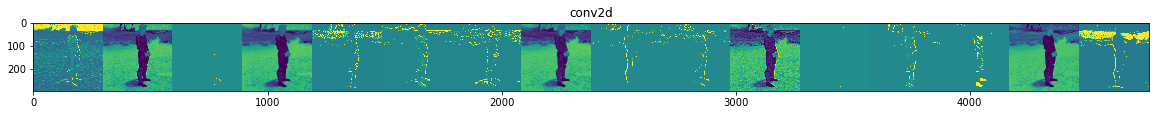

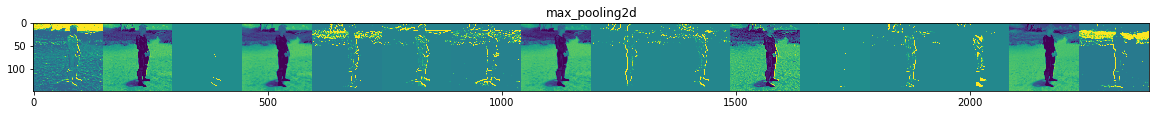

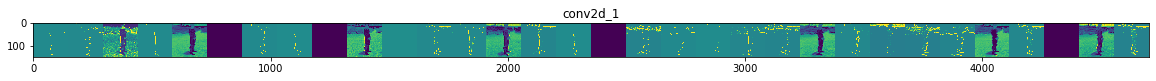

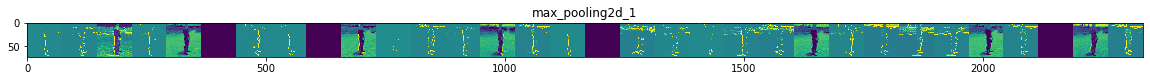

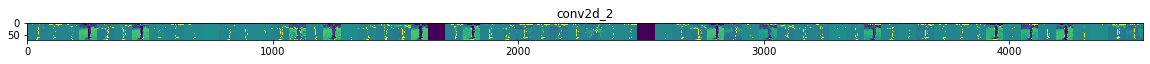

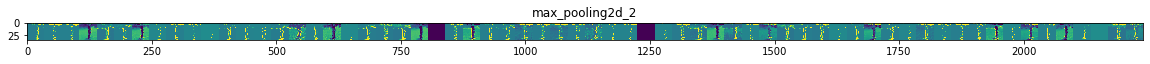

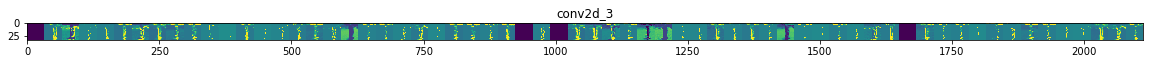

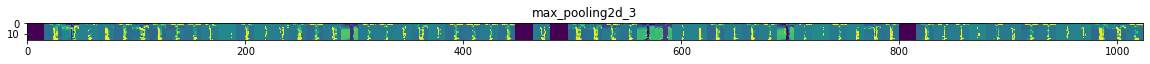

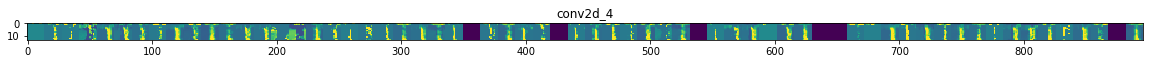

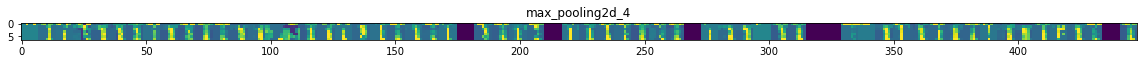

In [11]:
import random

successive_outputs = [layer.output for layer in model.layers]
for out in successive_outputs:
    print(out)
    
visualization_model = tf.keras.models.Model(inputs=model.input, outputs=successive_outputs)

horse_img_files = [os.path.join(train_horse_dir, f) for f in train_horse_names]
human_img_files = [os.path.join(train_human_dir, f) for f in train_human_names]
img_path = random.choice(horse_img_files+human_img_files)

img = tf.keras.preprocessing.image.load_img(img_path)
img = tf.keras.preprocessing.image.img_to_array(img)

img = img.reshape((1,)+img.shape)

img /= 255

successive_feature_maps = visualization_model.predict(img)

layer_names = [layer.name for layer in model.layers]

for layer_name, feature_map in zip(layer_names, successive_feature_maps):
    if len(feature_map.shape) == 4:
        n_features = feature_map.shape[-1]
        size = feature_map.shape[1]
        
        display_grid = np.zeros((size, size*n_features))
        
        for i in range(n_features):
            x =feature_map[0,:,:,i]
            
            x -= x.mean()
            x /= x.std()
            
            x *= 64
            x += 128
            
            x = np.clip(x, 0, 255).astype('uint8')
            
            display_grid[:, i*size:(i+1)*size]= x
            
        scale = 20./n_features
        plt.figure(figsize=(scale*n_features, scale))
        plt.title(layer_name)
        plt.grid(False)
        plt.imshow(display_grid, aspect='auto', cmap='viridis')